In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
MathStudentsDF = pandas.read_csv("DataSets/student-mat.csv")
PorStudentsDF = pandas.read_csv("DataSets/student-por.csv")
MathStudentsDF
PorStudentsDF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
#spajanje datasetova
# dodaje se nova kolona label koja oznacava iz kog skupa su podaci 1 Math Students 2 Por Students
MathStudentsDF['label']="1"
PorStudentsDF['label']="0"


Data = MathStudentsDF.append([MathStudentsDF,PorStudentsDF])
Data.drop(['Mjob', 'Fjob', 'reason', 'guardian','nursery','Medu','Fedu','famrel','traveltime'], axis=1, inplace=True)
#x = Data.iloc[:, [3]].values
Data

,school,sex,age,address,famsize,Pstatus,studytime,failures,schoolsup,famsup,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,2,0,yes,no,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,2,0,no,yes,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,2,3,yes,no,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,3,0,no,yes,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,2,0,no,yes,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,3,1,no,no,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,2,0,no,yes,...,3,4,1,1,1,4,15,15,16,0
646,MS,F,18,U,GT3,T,2,0,no,no,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,1,0,no,no,...,4,5,3,4,2,6,10,10,10,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'studytime'),
  Text(0, 2.5, 'failures'),
  Text(0, 3.5, 'freetime'),
  Text(0, 4.5, 'goout'),
  Text(0, 5.5, 'Dalc'),
  Text(0, 6.5, 'Walc'),
  Text(0, 7.5, 'health'),
  Text(0, 8.5, 'absences'),
  Text(0, 9.5, 'G1'),
  Text(0, 10.5, 'G2'),
  Text(0, 11.5, 'G3')])

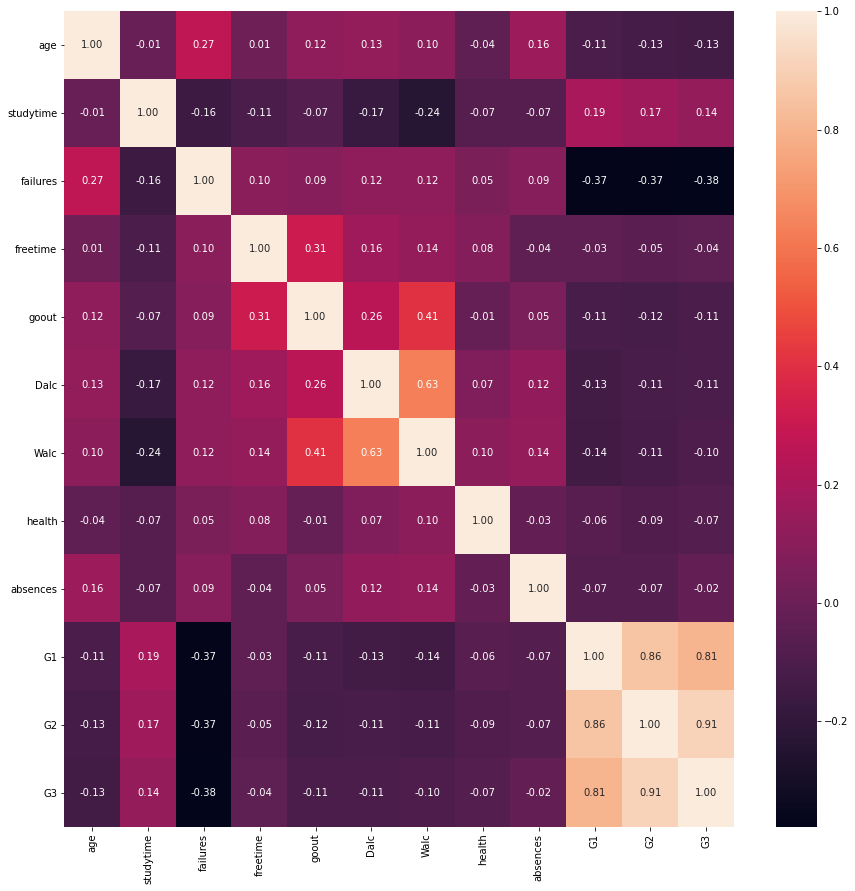

In [4]:
# Correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr(), annot = True, fmt= ".2f", cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

Text(0.5, 0, 'Weekly alcohol consumption')

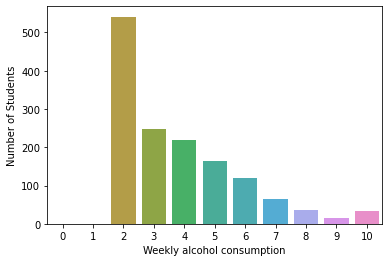

In [5]:
# ocene su u korelaciji najvise
# konzumiranje alkohola nedeljno 
# spajaju se kolone za konzumiranje alkohola vikendom i radnim danima i prikazuje koliko studenti piju nedeljno
Data2 = Data
Data2['Dalc'] = Data2['Dalc'] + Data2['Walc']
list = []
for i in range(11):
    list.append(len(Data2[Data2.Dalc == i]))
    
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

In [6]:
# Preprocesiranje podataka brebacivanje iz stringa u numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

Data = FunLabelEncoder(Data)
Data.info()
Data.iloc[0:4,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 648
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1439 non-null   int32
 1   sex         1439 non-null   int32
 2   age         1439 non-null   int64
 3   address     1439 non-null   int32
 4   famsize     1439 non-null   int32
 5   Pstatus     1439 non-null   int32
 6   studytime   1439 non-null   int64
 7   failures    1439 non-null   int64
 8   schoolsup   1439 non-null   int32
 9   famsup      1439 non-null   int32
 10  paid        1439 non-null   int32
 11  activities  1439 non-null   int32
 12  higher      1439 non-null   int32
 13  internet    1439 non-null   int32
 14  romantic    1439 non-null   int32
 15  freetime    1439 non-null   int64
 16  goout       1439 non-null   int64
 17  Dalc        1439 non-null   int64
 18  Walc        1439 non-null   int64
 19  health      1439 non-null   int64
 20  absences    1439 non-null   int

,school,sex,age,address,famsize,Pstatus,studytime,failures,schoolsup,famsup,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,0,0,18,1,0,0,2,0,1,0,...,3,4,2,1,3,6,5,6,6,1
1,0,0,17,1,0,1,2,0,0,1,...,3,3,2,1,3,4,5,5,6,1
2,0,0,15,1,1,1,2,3,1,0,...,3,2,5,3,3,10,7,8,10,1
3,0,0,15,1,0,1,3,0,0,1,...,2,2,2,1,5,2,15,14,15,1


In [7]:
#vrednost koja se predvidja
Y = Data['G3']
X = Data.drop('G3', axis=1)

#skaliranje vrednosti za predvidjanje
scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [8]:
# deljenje podataka na trening i test podatke 
from sklearn.model_selection import train_test_split
#Y = Data['label']
#X = Data.drop(columns=['label'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=9)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X train shape:  (1007, 24)
Y train shape:  (1007,)
X test shape:  (432, 24)
Y test shape:  (432,)


In [10]:
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 'mean_squared_logarithmic_error', metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25,32],
              'epochs': [100,500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_parameters
best_accuracy

Epoch 1/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 11/

37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 82/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 83/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 84/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 85/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 86/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 87/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 88/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 89/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 90/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3278 - accuracy: 0.0011
Epoch 91/100


37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 58/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 59/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 60/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 61/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 62/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 63/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 64/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 65/100
37/37 [==============================] - ETA: 0s - loss: 2.3782 - accuracy: 0.0021   - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 66/100
37/37 [==============================] - 0s 3ms/step -

37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 39/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 40/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 41/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 42/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 43/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 44/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 45/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 46/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 47/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0011
Epoch 48/100


37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 19/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 20/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 21/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 22/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 23/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 24/100
37/37 [==============================] - ETA: 0s - loss: 2.3336 - accuracy: 0.0000e+ - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 25/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 26/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 27/100
37/37 [==============================] - 0s 3ms/step -

37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 99/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3775 - accuracy: 0.0011
Epoch 100/100
37/37 [==============================] - 0s 8ms/step - loss: 2.3775 - accuracy: 0.0011 ETA: 0s - loss: 2.4389 - accuracy: 0.
Epoch 1/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3544 - accuracy: 0.0011 ETA: 0s - loss: 2.3439 - accuracy: 0.0000e+
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 7/100
37/37 [=================

37/37 [==============================] - 0s 3ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 76/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 77/100
37/37 [==============================] - 0s 7ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 78/100
37/37 [==============================] - 0s 8ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 79/100
37/37 [==============================] - 0s 9ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 80/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 81/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 82/100
37/37 [==============================] - 0s 4ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 83/100
37/37 [==============================] - 0s 5ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 84/100
37/37 [==============================] - 0s 6ms/step - loss: 2.3544 - accuracy: 0.0011
Epoch 85/100


37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 54/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 55/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 56/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 57/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 58/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 59/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 60/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 61/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 62/100
37/37 [==============================] - 0s 3ms/step - loss: 2.3582 - accuracy: 0.0011
Epoch 63/100


In [3]:
MathStudentsReducedDF = MathStudentsDF.drop(['school', 'address', 'Mjob', 'Fjob', 'reason', 'traveltime', 'failures', 'activities', 'nursery', 'G1', 'G2', 'G3'], axis = 1)
MathStudentsReducedDF

,sex,age,famsize,Pstatus,Medu,Fedu,guardian,studytime,schoolsup,famsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,GT3,A,4,4,mother,2,yes,no,...,yes,no,no,4,3,4,1,1,3,6
1,F,17,GT3,T,1,1,father,2,no,yes,...,yes,yes,no,5,3,3,1,1,3,4
2,F,15,LE3,T,1,1,mother,2,yes,no,...,yes,yes,no,4,3,2,2,3,3,10
3,F,15,GT3,T,4,2,mother,3,no,yes,...,yes,yes,yes,3,2,2,1,1,5,2
4,F,16,GT3,T,3,3,father,2,no,yes,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2,2,other,2,no,yes,...,yes,no,no,5,5,4,4,5,4,11
391,M,17,LE3,T,3,1,mother,1,no,no,...,yes,yes,no,2,4,5,3,4,2,3
392,M,21,GT3,T,1,1,other,1,no,no,...,yes,no,no,5,5,3,3,3,3,3
393,M,18,LE3,T,3,2,mother,1,no,no,...,yes,yes,no,4,4,1,3,4,5,0


In [4]:
MathStudentsReducedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        395 non-null    object
 1   age        395 non-null    int64 
 2   famsize    395 non-null    object
 3   Pstatus    395 non-null    object
 4   Medu       395 non-null    int64 
 5   Fedu       395 non-null    int64 
 6   guardian   395 non-null    object
 7   studytime  395 non-null    int64 
 8   schoolsup  395 non-null    object
 9   famsup     395 non-null    object
 10  paid       395 non-null    object
 11  higher     395 non-null    object
 12  internet   395 non-null    object
 13  romantic   395 non-null    object
 14  famrel     395 non-null    int64 
 15  freetime   395 non-null    int64 
 16  goout      395 non-null    int64 
 17  Dalc       395 non-null    int64 
 18  Walc       395 non-null    int64 
 19  health     395 non-null    int64 
 20  absences   395 non-null    int64

In [5]:
Input = MathStudentsReducedDF.iloc[:,14:17]
Input

,famrel,freetime,goout
0,4,3,4
1,5,3,3
2,4,3,2
3,3,2,2
4,4,3,2
...,...,...,...
390,5,5,4
391,2,4,5
392,5,5,3
393,4,4,1


In [6]:
OutputWorkday = MathStudentsReducedDF.iloc[:, 17]
OutputWorkday

0      1
1      1
2      2
3      1
4      1
      ..
390    4
391    3
392    3
393    3
394    3
Name: Dalc, Length: 395, dtype: int64

In [7]:
OutputWeekend = MathStudentsReducedDF.iloc[:, 18]
OutputWeekend

0      1
1      1
2      3
3      1
4      2
      ..
390    5
391    4
392    3
393    4
394    3
Name: Walc, Length: 395, dtype: int64

In [8]:
encoder = LabelEncoder()
encoder.fit(OutputWeekend)
encoded_output = encoder.transform(OutputWeekend)
dummy_y_weekend = np_utils.to_categorical(encoded_output)
dummy_y_weekend

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [9]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=3, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose = 0)

In [11]:
kfold = KFold(n_splits=10, shuffle=True)

In [12]:
results = cross_val_score(estimator, Input, dummy_y_weekend, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 38.00% (8.49%)
